Study the decision tree algorithm, focusing on both entropy based information gain and Gini index for splitting. Build decision trees and random forests for the loan datasets.

In [44]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import seaborn as sns 

In [3]:
import os

os.getcwd()

'/Users/shubhamgoyal'

In [5]:
os.chdir('/Users/shubhamgoyal/Downloads/DataSciece19098/')
os.getcwd()

'/Users/shubhamgoyal/Downloads/DataSciece19098'

In [15]:
loan_df= pd.read_excel('loan.xlsx')
loan_df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [16]:
#one hot encoding product_info_2 var as it is string categorical variable

from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
col_enc = ['Res_status', 'Liab_ref', 'Job_status', 'Acc_ref', 'Telephone', 'Sex', 'Occupation']

# Use the one-hot encoder to transform the categorical data columns. 
loan_df_enc = pd.DataFrame(OH_encoder.fit_transform(loan_df[col_enc]))

#reassigning the original index.
loan_df_enc.index = loan_df_enc.index

# Addings columns as per the encoding 
loan_df_enc.columns = OH_encoder.get_feature_names(col_enc)

# Create dataframes that only include the numerical features/columns (these will be concatenated with the one-hot encoded dataframes).
loan_df_no_enc = loan_df.drop(col_enc, axis=1)

# Concatenate the one-hot encoded columns with the existing numerical features/columns.
loan_df_upd = pd.concat([loan_df_no_enc, loan_df_enc], axis=1)
loan_df_upd.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Res_status_owner,Res_status_rent,Liab_ref_f,...,Occupation_executive,Occupation_guard_etc,Occupation_labourer,Occupation_manager,Occupation_office_st,Occupation_productio,Occupation_professio,Occupation_sales,Occupation_semi_pro,Occupation_unemploye
0,50.750000,0.585,0,0,145,0,reject,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,19.670000,10.000,0,0,140,0,reject,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.830002,15.000,5,14,0,2200,accept,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.670000,2.540,2,0,0,0,accept,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.250000,13.000,0,0,228,0,reject,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
count_cat= len(loan_df.drop('Decision',axis=1).select_dtypes(include=['object']).columns.tolist())
count_num = len(loan_df.drop('Decision',axis=1).select_dtypes(include=['int64','float64']).columns.tolist())

print("No. of categorical variables:",count_cat)
print("No. of numerical variables:",count_num)

No. of categorical variables: 7
No. of numerical variables: 6


In [29]:
# Decision tree with gini as the criterion
dt_gini = DecisionTreeClassifier(random_state=42)

X=loan_df_upd.drop('Decision',axis=1)
y=loan_df_upd['Decision']

dt_gini.fit(X,y)

DecisionTreeClassifier(random_state=42)

In [50]:
y_pred_gini=dt_gini.predict(X)

from sklearn.metrics import classification_report

print(classification_report(y,y_pred_gini)) 

# accuracy is ~100% because its predicting on train
#i have not divided the data into test and train due to small size of the data, i'm just developing infrerence
#from generated trees 

              precision    recall  f1-score   support

      accept       1.00      1.00      1.00       192
      reject       1.00      1.00      1.00       237

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



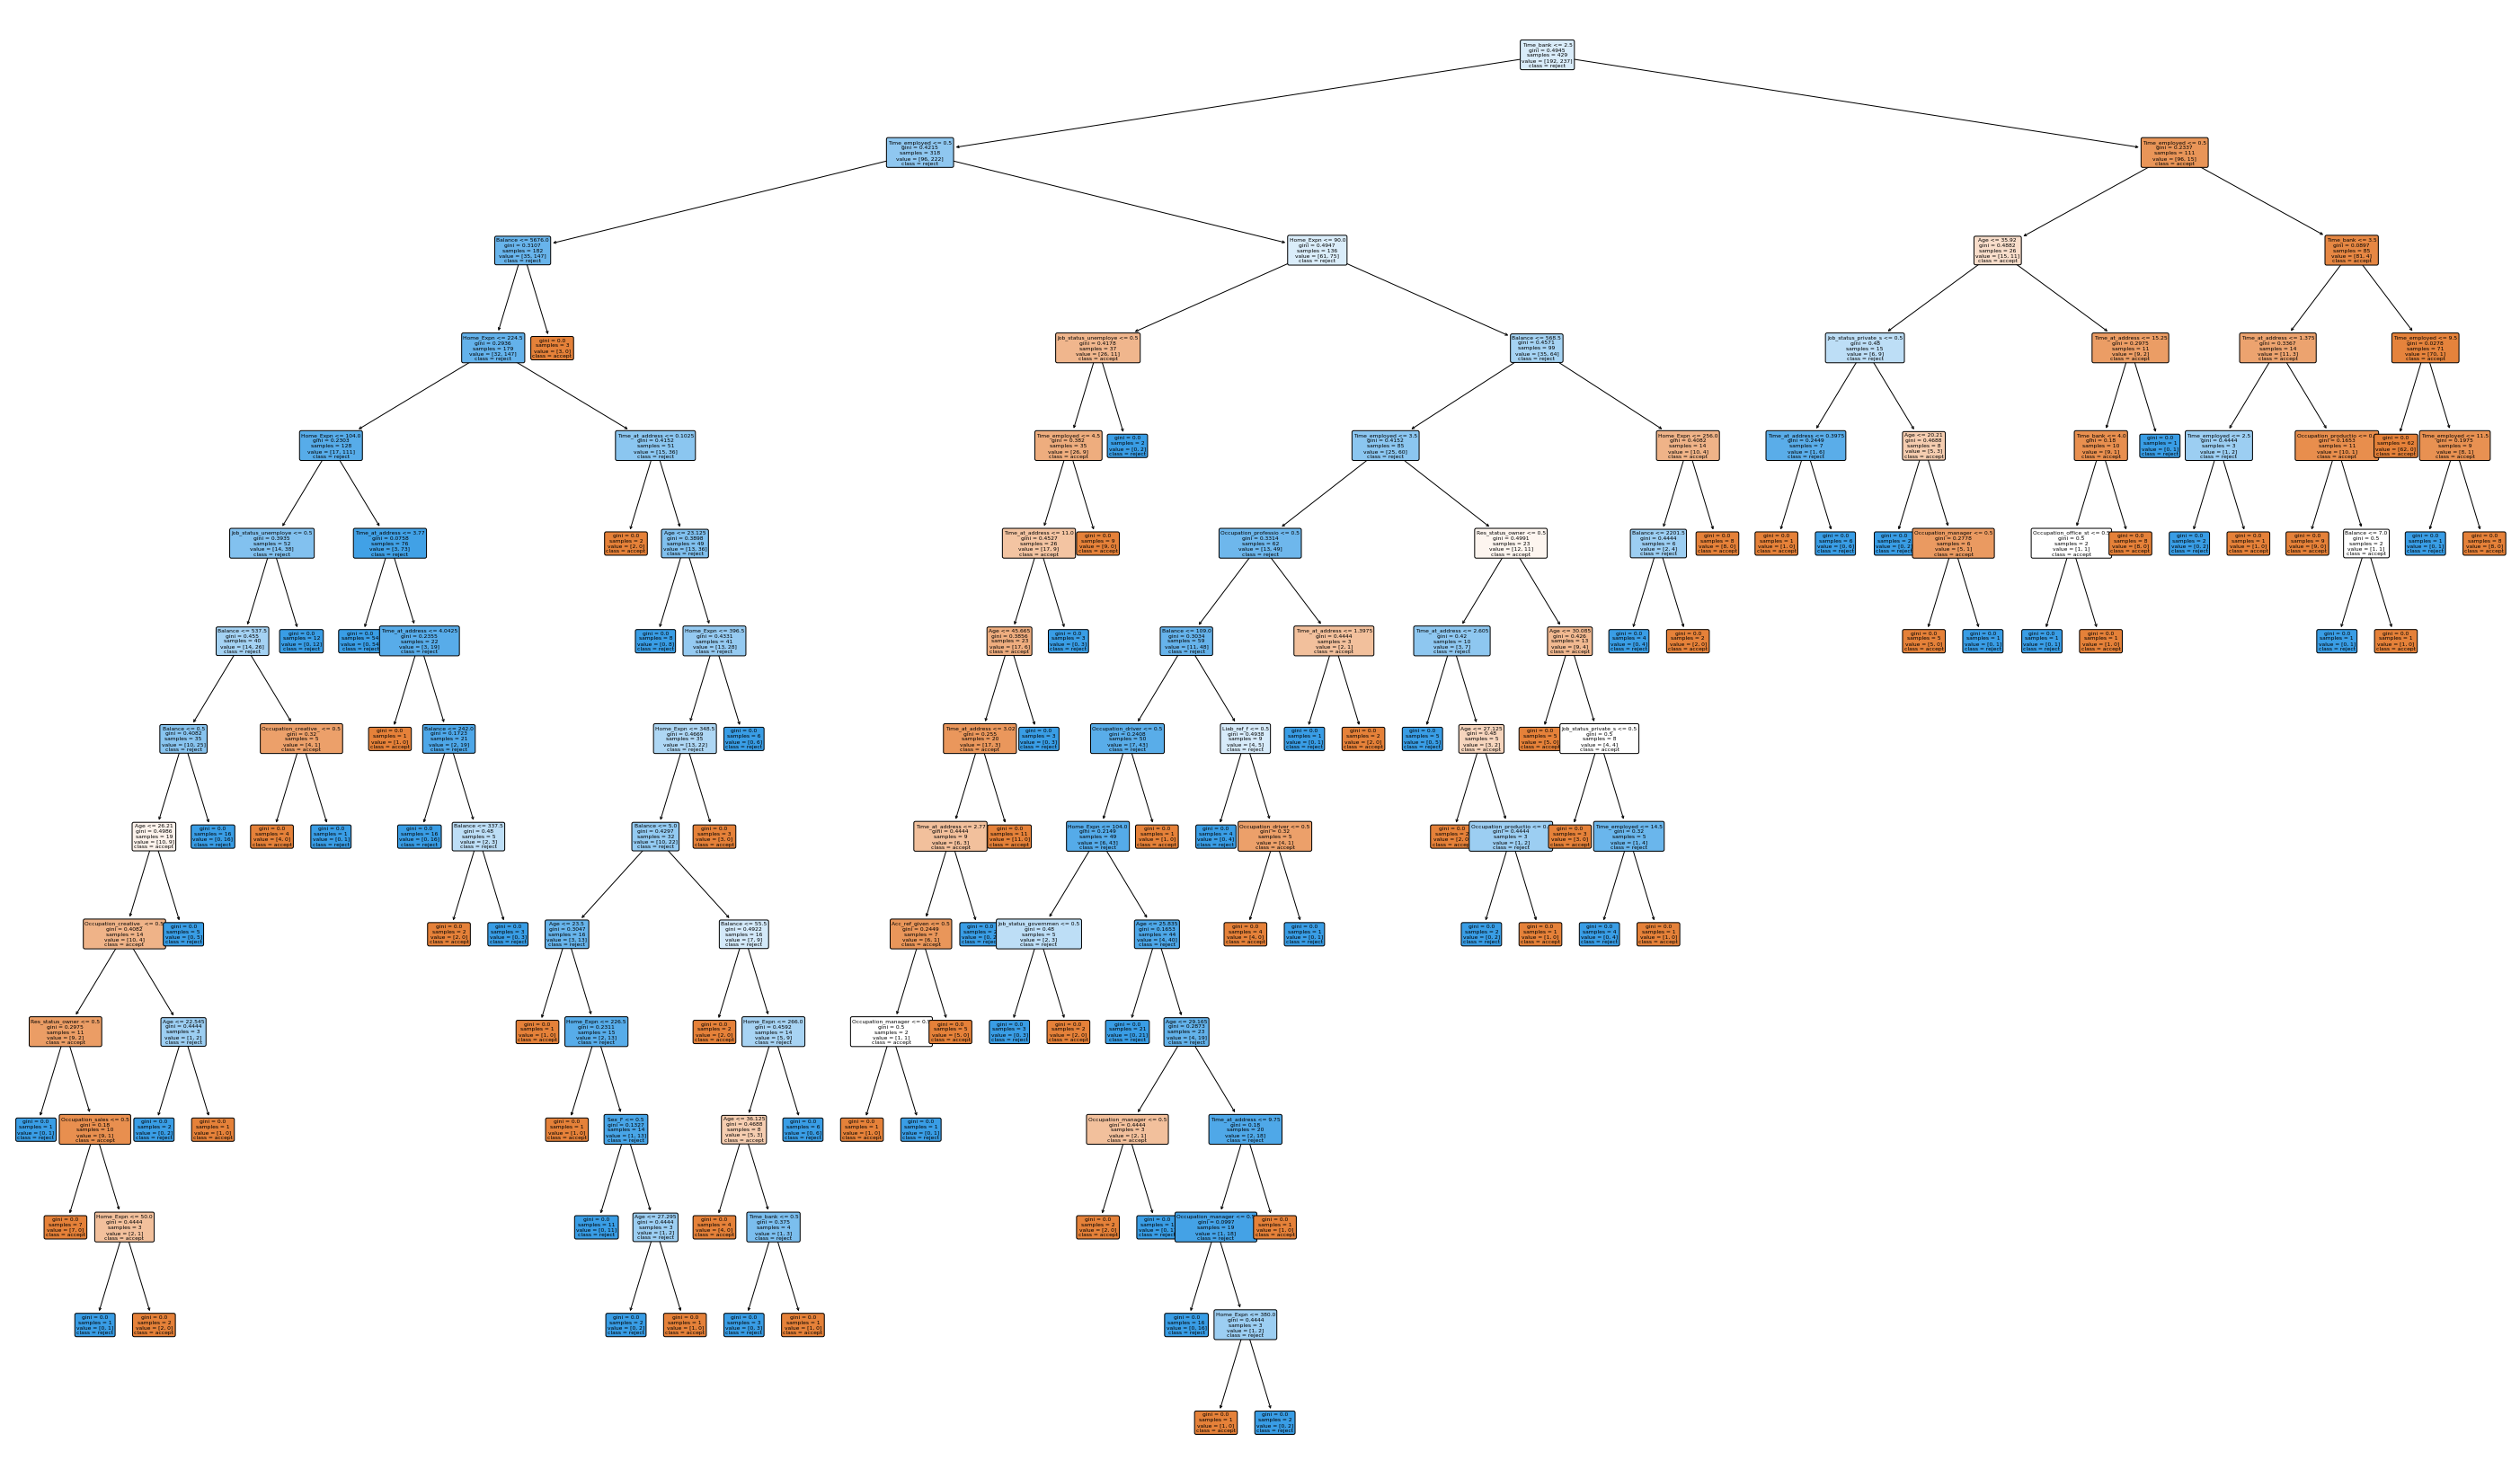

In [36]:
plt.figure(figsize=(50,30))
_ = plot_tree(dt_gini, 
                   feature_names=X.columns,  
                   class_names=['accept','reject'],
                   precision=4,rounded=True,filled=True,fontsize=6)
plt.savefig("dt_gini.png",dpi=300)
#slightly small but resolution is good, can zoom in to see the text.

Inference: <br>

1) We can observe that top variables with max gini are on top of the tree (initial splits) which are - time_bank,
time_employed, Balance, and age. There are some variations of job_status (unemployed etc)as well which contribute most to the model <br>

In [33]:
#decision tree with entropy(information gain) as criterion

dt_entropy = DecisionTreeClassifier(criterion='entropy',random_state=42)

X=loan_df_upd.drop('Decision',axis=1)
y=loan_df_upd['Decision']

dt_entropy.fit(X,y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [51]:
y_pred_ent=dt_entropy.predict(X)

from sklearn.metrics import classification_report

print(classification_report(y,y_pred_ent)) 

# accuracy is ~100% because its predicting on train
#i have not divided the data into test and train due to small size of the data, i'm just developing infrerence
#from generated trees 

              precision    recall  f1-score   support

      accept       1.00      1.00      1.00       192
      reject       1.00      1.00      1.00       237

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



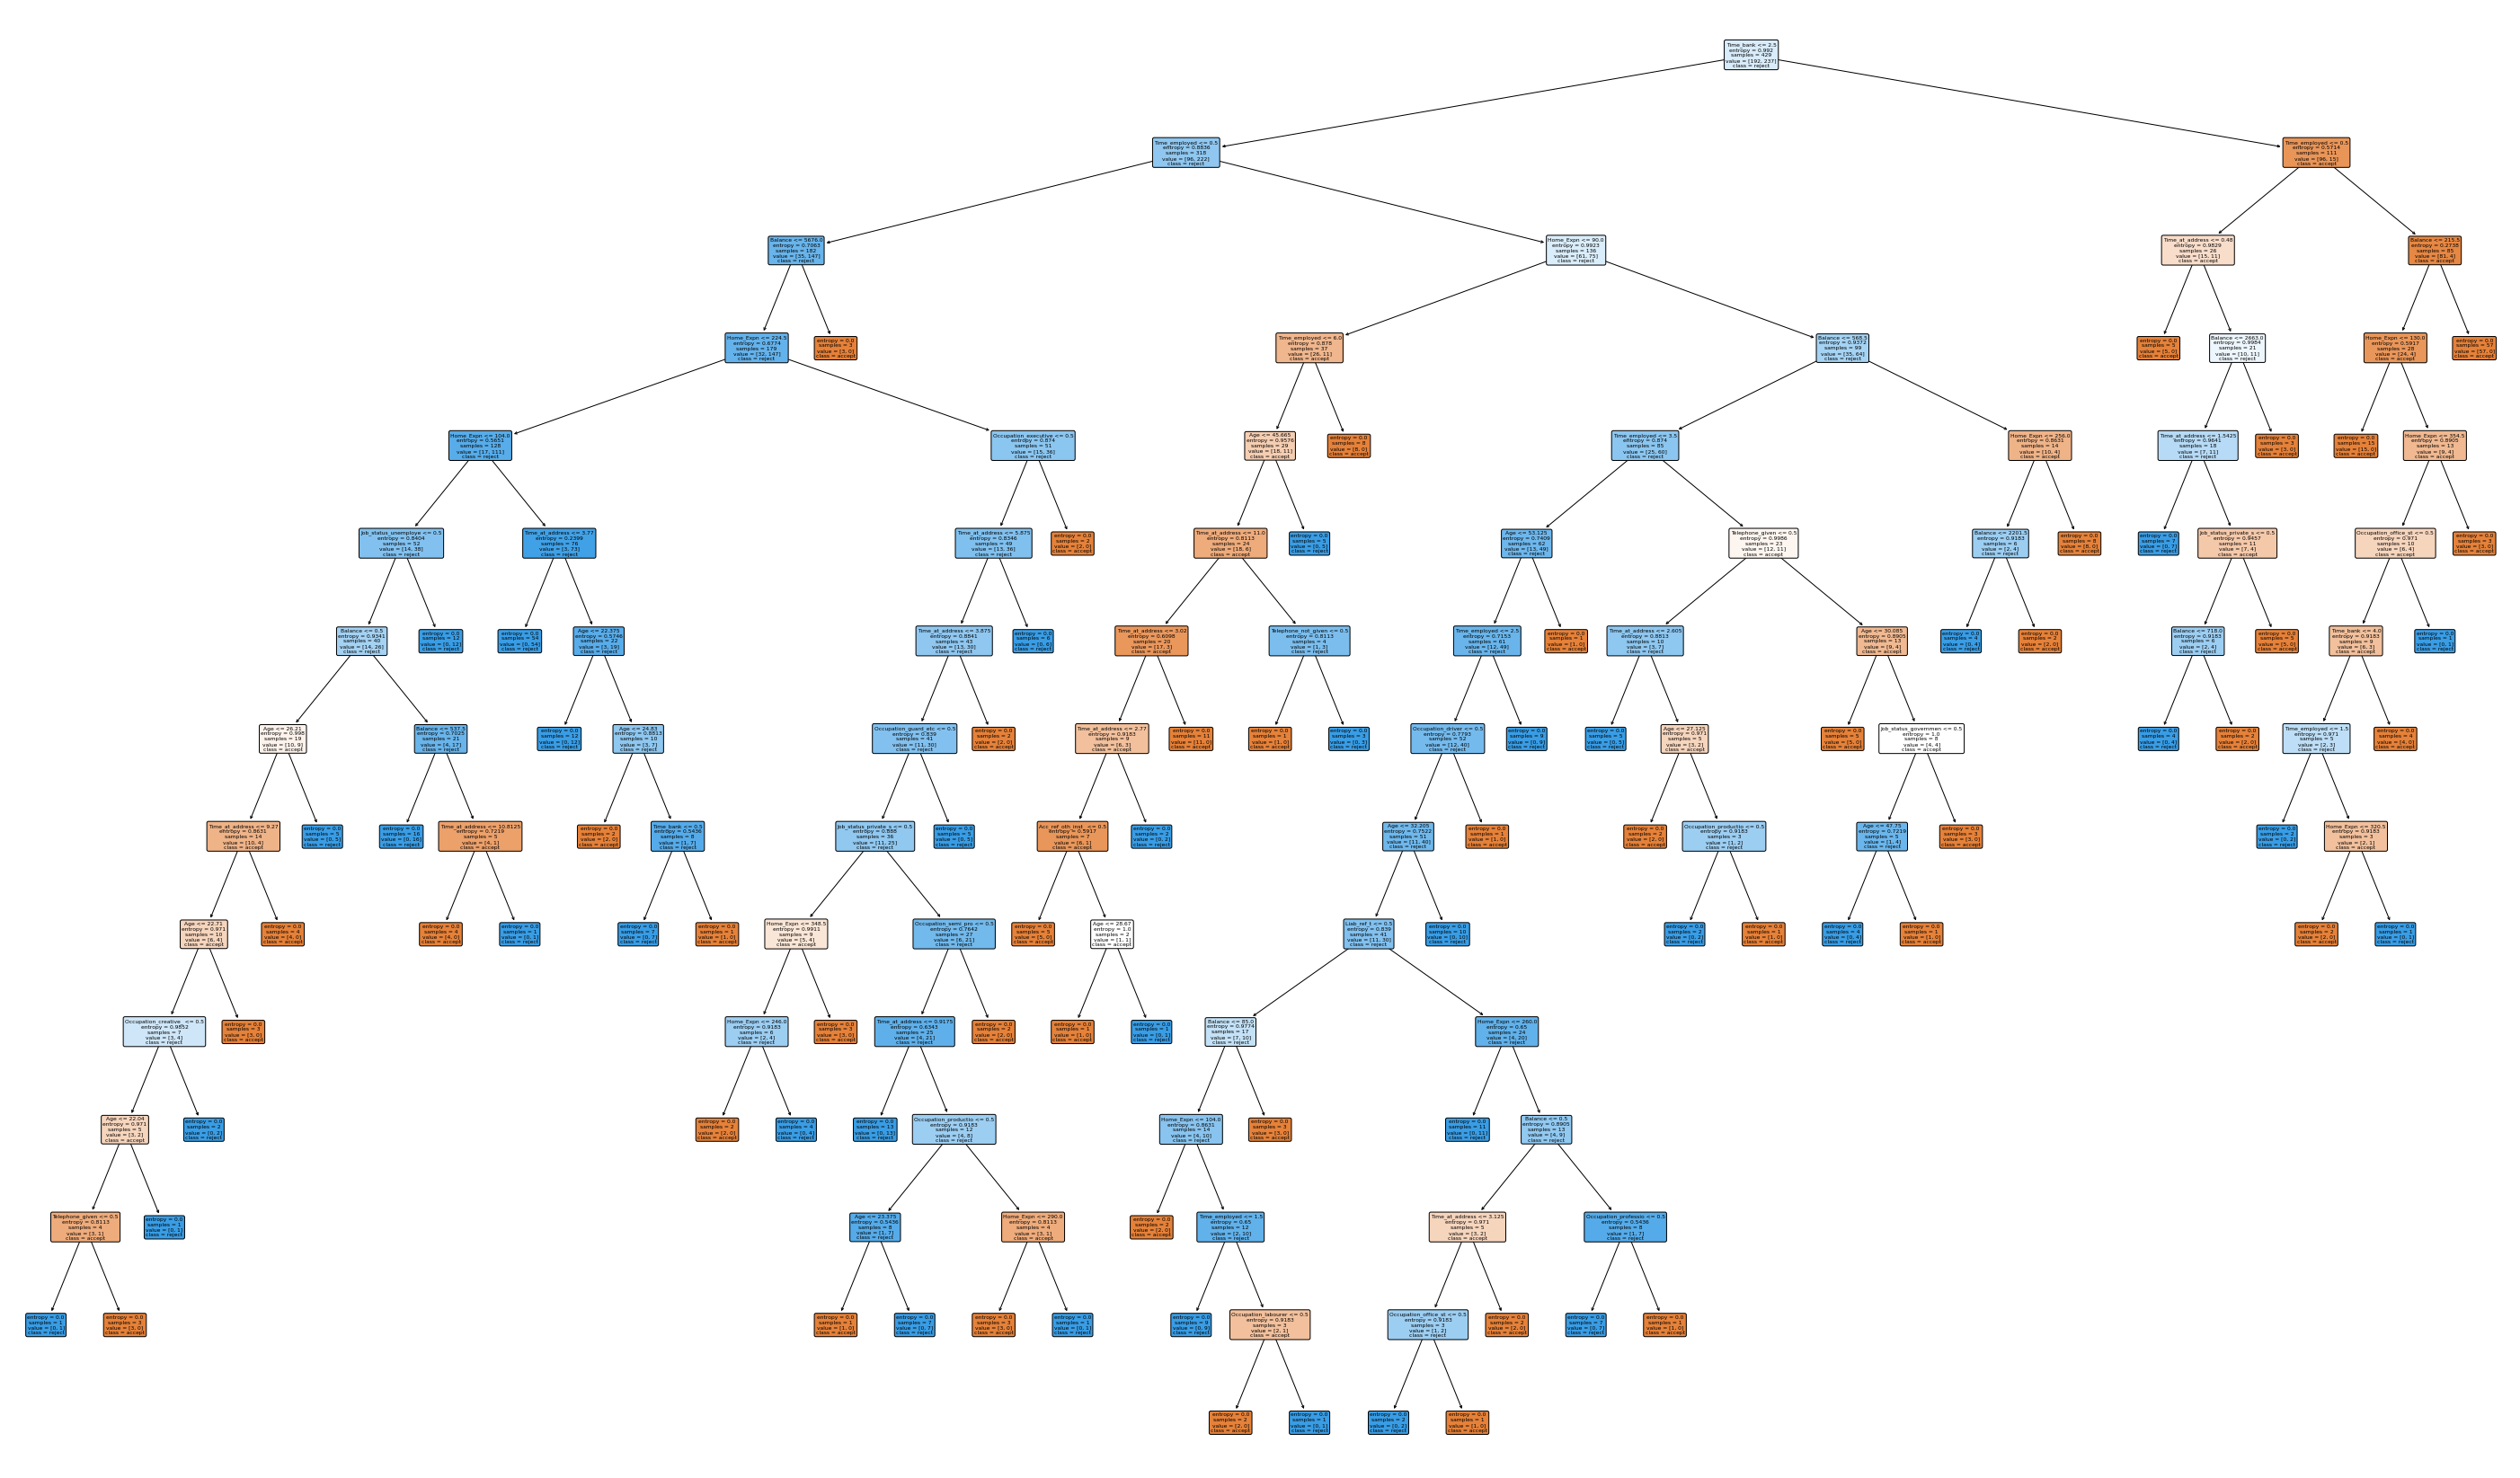

In [35]:
plt.figure(figsize=(50,30))
_ = plot_tree(dt_entropy, 
                   feature_names=X.columns,  
                   class_names=['accept','reject'],
                   precision=4,rounded=True,filled=True,fontsize=6)
plt.savefig("dt_entropy.png",dpi=300)
#slightly small but resolution is good, can zoom in to see the text.

Inference: <br>

1) Major variables in top nodes remain same as decision tree with gini, however variables based on job_status (unemployed, government etc) have gone to lower nodes indicating reduced importance. <br>
2) Variables related to bank, home (assets) and tenure at bank/employment are most significant deciding factors

## Random forest application

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(random_state=0)

rfc.fit(X, y)

RandomForestClassifier(random_state=0)

In [47]:
 

# view the feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores[0:10]



Time_bank               0.152099
Balance                 0.123216
Time_employed           0.110578
Home_Expn               0.107331
Time_at_address         0.102991
Age                     0.093414
Job_status_governmen    0.019009
Liab_ref_f              0.018030
Liab_ref_t              0.017370
Job_status_private_s    0.017196
dtype: float64

In [55]:
feature_scores[-10:]
#least important features

Occupation_sales        0.008481
Telephone_given         0.008454
Acc_ref_oth_inst_       0.008045
Occupation_manager      0.007818
Telephone_not_given     0.007593
Occupation_driver       0.006118
Occupation_executive    0.005621
Job_status_student      0.002913
Job_status_retired      0.002247
Job_status_military     0.000471
dtype: float64

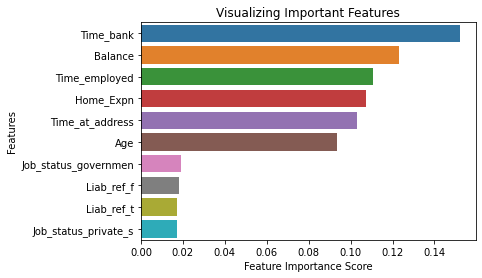

In [49]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores[0:10], y=feature_scores.index[0:10])

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')


# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [52]:
y_pred=rfc.predict(X)

from sklearn.metrics import classification_report

print(classification_report(y,y_pred)) 

# accuracy is ~100% because its predicting on train
#i have not divided the data into test and train due to small size of the data, i'm just developing infrerence
#from generated trees and feature importance

              precision    recall  f1-score   support

      accept       1.00      1.00      1.00       192
      reject       1.00      1.00      1.00       237

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



Inference: <br>

1) From random forest model as well, we can infer top variables to time_bank, balance, time_employed and home_expn
which are very intuitive as well wrt to loan acceptance.